# Rice Classification: Classifying a Grain of Rice with Neutral Physical Properties
### DSCI100: Project Proposal (Group 124)

##### Sean Park (66350992)
##### Deacon Sowerby (50471499)
##### Gabriel Reyes (80274921)
##### David Rao (55832919)

In [13]:
#options(repr.matrix.max.rows = 6)
library(tidyverse)

## Introduction

### -> About the dataset
Different types of rice are classified biologically by their origin; however, some of these types can also be identified by their physical shape. In our dataset, "riceClassification.csv", there are more than 15,000 observations of rice grains with specified physical measurements that classify as either the rice type "**Gonen**' (indicated by the factor 0) or "**Jasmine**" (indicated by the factor 1). This data has been specially modified for binary classification.

In [ ]:
url = "https://raw.githubusercontent.com/sean-prk/dsci-100-group-proposal/main/data/riceClassification.csv"

download.file(url, "riceClassification.csv")

rice_data <- read_csv("riceClassification.csv") #|>
    #mutate(Class = as_factor(Class))
rice_data

Rows: 18185 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): id, Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexAr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### -> Our objective
We will build a classifier that classifies a rice grain as either Gonen or Jasmine given its physical properties. Using this classifier, we want to predict the class of a new rice observation that we will create to be seemingly neutral; the variables of this new observation will be decided by taking the average for that measurement from the original dataset (see below). 

In [6]:
new_obs <- rice_data |>
    map(cols = Area:Class, mean) |>  
                #take mean of every potential predictor variable
    as_tibble() 
                #use results as the measurements for new observation
new_obs

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9093,7036.493,151.6808,59.80785,0.9154064,7225.818,94.13295,0.6166528,351.6069,0.7079983,2.599081,NA


Our project will be surrounding the following question: **Which class, either Gonen or Jasmine, will this "neutral" observation be classified as?**
As well, what statistical factors will influence/determine the decision of our classifier?

## Preliminary exploratory data analysis

### -> Summary by class:
The two classes are summarized in the table below: in each class, the mean of each variable, as well as the total count of observations are recorded.

In [7]:
rice_summary <- rice_data %>%
    group_by(Class) %>%
    summarize(Count = n(), Missing = sum(is.na(.)), across(c(Area:AspectRation), ~ mean(.x, na.rm = TRUE)))
rice_summary

Class,Count,Missing,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,8200,0,8358.541,153.6984,69.99743,0.8887991,8575.295,102.98017,0.6516059,368.9664,0.7697762,2.199598
1,9985,0,5950.785,150.0238,51.43984,0.9372571,6117.584,86.86733,0.5879483,337.3508,0.6572644,2.927149


We can see that there are slightly more observations of rice that are classified as Jasmine, and there are no missing data. 

### -> Visualization for insight
The following plots demonstrate each class' distribution of values within each variable. We paired the variables in a scatterplot to recognize any significant relationships that may occur. The highlighted point in each plot represents the new "neutral" observation that we will be predicting for our project. Note that **0=Gonen, and 1=Jasmine**.

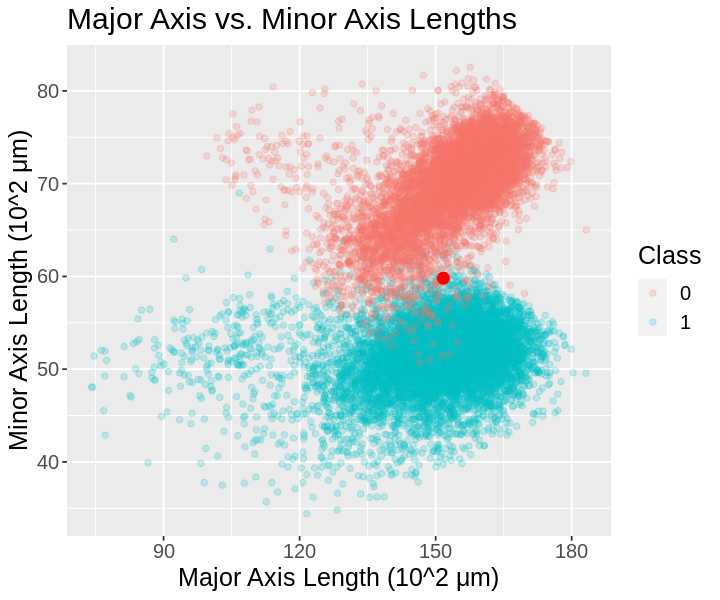

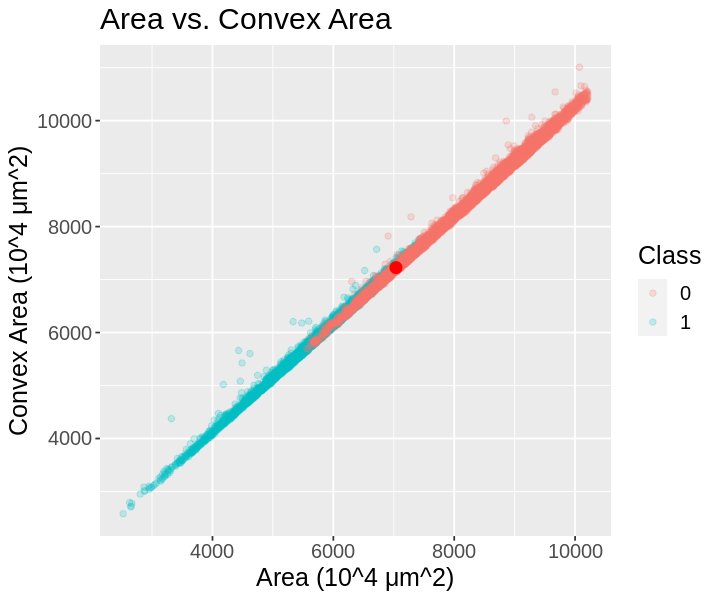

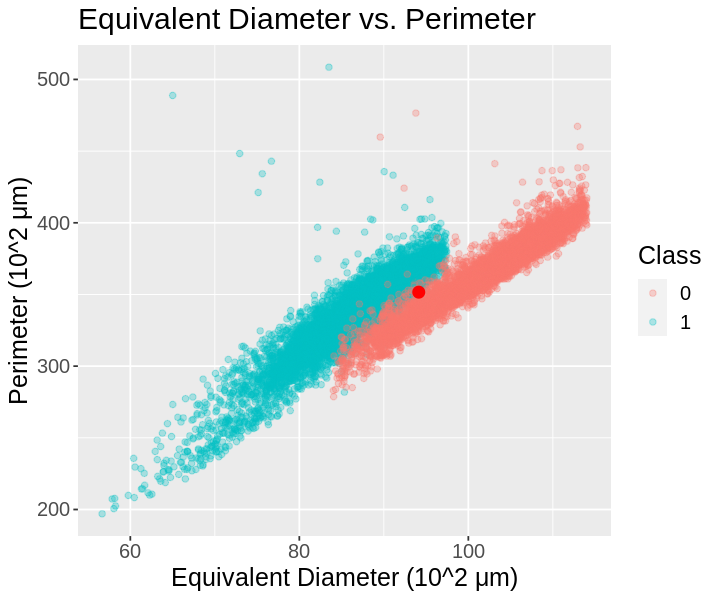

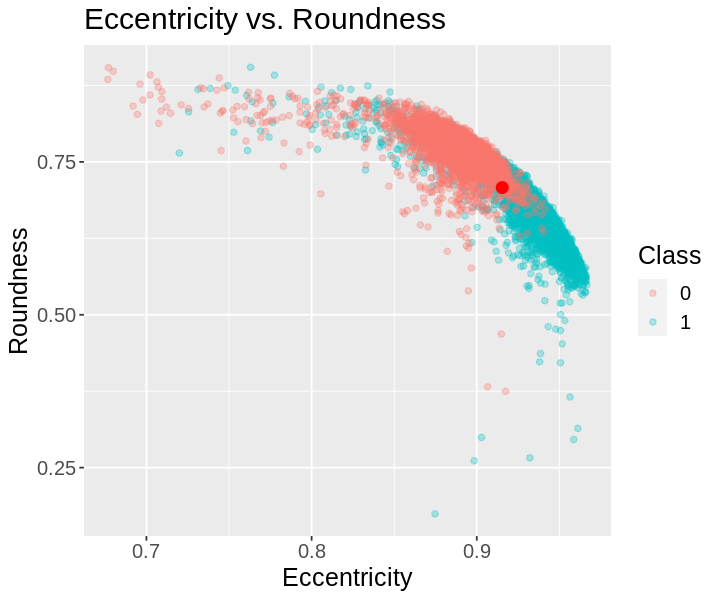

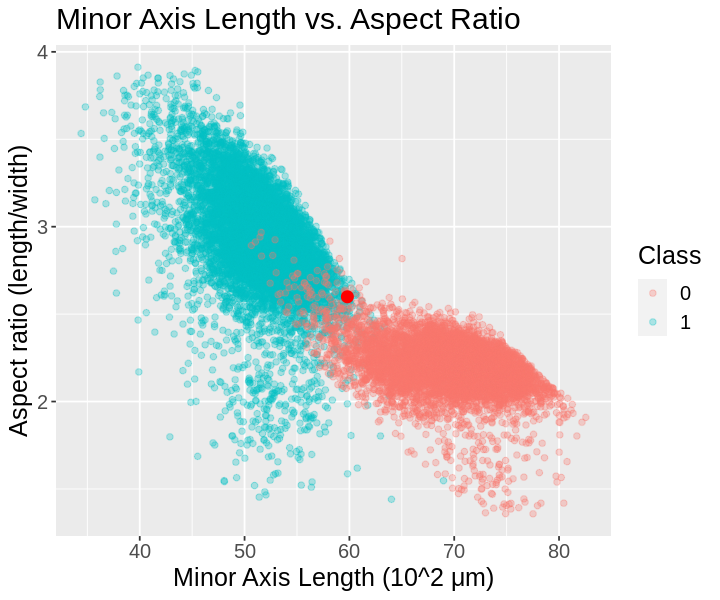

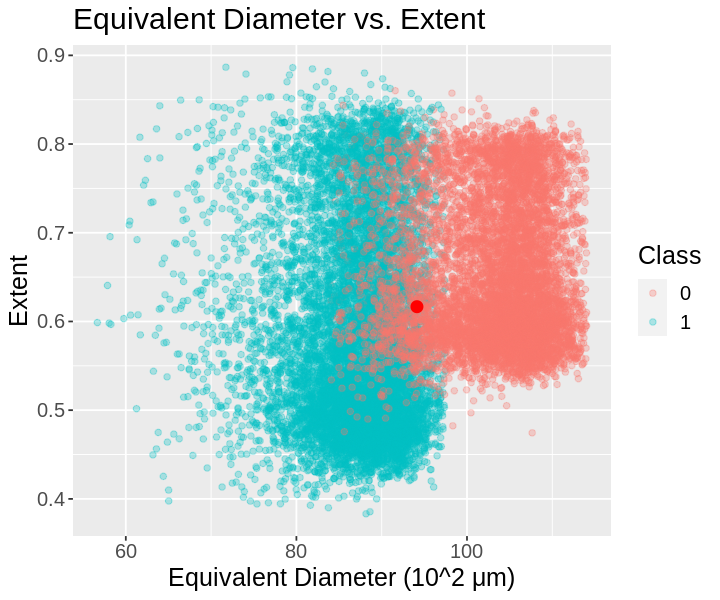

In [10]:
options(repr.plot.width=6,repr.plot.height=5)

#MajorAxisLength vs MinorAxisLength
ggplot(rice_data, aes(x=MajorAxisLength, y = MinorAxisLength, color=Class)) +
    geom_point(alpha=0.2) + 
    ggtitle("Major Axis vs. Minor Axis Lengths")  +
    labs(x = "Major Axis Length (10^2 μm)",
         y = "Minor Axis Length (10^2 μm)") +
    geom_point(data=new_obs,
             aes(x=MajorAxisLength,y=MinorAxisLength), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

#Area vs ConvexArea
ggplot(rice_data, aes(x=Area, y = ConvexArea, color=Class)) +
    geom_point(alpha=0.2) + 
    ggtitle("Area vs. Convex Area")  +
    labs(x = "Area (10^4 μm^2)",
         y = "Convex Area (10^4 μm^2)") +
    geom_point(data=new_obs,
             aes(x=Area,y=ConvexArea), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

#EquivDiameter vs Perimeter
ggplot(rice_data, aes(x=EquivDiameter, y = Perimeter, color=Class)) +
    geom_point(alpha=0.3) + 
    ggtitle("Equivalent Diameter vs. Perimeter")  +
    labs(x = "Equivalent Diameter (10^2 μm)",
         y = "Perimeter (10^2 μm)") +
    geom_point(data=new_obs,
             aes(x=EquivDiameter,y=Perimeter), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

#Eccentricity vs Roundness
ggplot(rice_data, aes(x=Eccentricity, y = Roundness, color=Class)) +
    geom_point(alpha=0.3) + 
    ggtitle("Eccentricity vs. Roundness")  +
    labs(x = "Eccentricity",
         y = "Roundness") +
    geom_point(data=new_obs,
             aes(x=Eccentricity,y=Roundness), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

#MinorAxisLength vs AspectRatio
ggplot(rice_data, aes(x=MinorAxisLength, y = AspectRation, color=Class)) +
    geom_point(alpha=0.3) + 
    ggtitle("Minor Axis Length vs. Aspect Ratio")  +
    labs(x = "Minor Axis Length (10^2 μm)",
         y = "Aspect ratio (length/width)") +
    geom_point(data=new_obs,
             aes(x=MinorAxisLength,y=AspectRation), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

#EquivDiameter vs Extent
ggplot(rice_data, aes(x=EquivDiameter, y = Extent, color=Class)) +
    geom_point(alpha=0.3) + 
    ggtitle("Equivalent Diameter vs. Extent")  +
    labs(x = "Equivalent Diameter (10^2 μm)",
         y = "Extent") +
    geom_point(data=new_obs,
             aes(x=EquivDiameter,y=Extent), 
             color='red',
             size=3) +
    theme(text = element_text(size=15))

### Methods

### -> Our plan:

#### I. Preprocessing the data + creating the new observation

As shown above, our data is already tidy. However, referencing the plots above, we will filter the following variables from the dataset:

* **id**: The unique identifier for each observation
* **ConvexArea**: Has a strong positive relationship with Area. Since we can accurately estimate ConvexArea using Area, there is no need to keep both variables in the dataset.
* **AspectRatio**: Is calculated by dividing length by width, which is unneeded if we have MajorAxisLength and MinorAxisLength.
* **Roundness**: Feature is similar to Eccentricity (the deviation from the curve), as indicated by the strong negative relationship.

Other variables that we may filter out after testing our classifier:

* **MajorAxisLength**: Has a similar distribution of values in both classes of rice, therefore may not be useful for effective classification.
* **Extent**: Like MajorAxisLength, the distribution of values is not very distinct for each class.

In our project, we will test these predictors to see if they provide a higher accuracy.

#### II. Making the classifier

Steps:

1. Split the data into a training set and testing set using initial_split().

2. Filter out the 4 variables that are not necessary (see above).

3. Split the training set for **10-fold cross validation**.

4. Create a tuning model using nearest_neighbor(), ready to adjust the K parameter.

5. Create four different recipe models with four different predictor lists:
    * other predictors + none
    * other predictors + MajorAxisLength
    * other predictors + Extent
    * other predictors + MajorAxisLength + Extent
    
   to determine whether the predictors of which we are uncertain of provide a higher accuracy.
   
6. Create 4 workflow() models (one with a differnt recipe model), and test for 50 different k parameters using tune_grid().

7. Find the k parameter for each workflow model that supplies the highest accuracy by collecting and analyzing the given metrics. (collect_metrics())

6. Using the new k parameter, retrain each classifier (by creating new k-specific models).

7. Using the testing data, test the accuracy of each classifier and choose the classifier whose set of predictors provides the highest accuracy.

#### III. Applying the classifier to the observation

10. Create the neutral observation point from the original data (new_obs).

11. Using the classifier, classify the unknown rice grain and analyze the results.

### Expected outcomes

We expect our "neutral" observation to be classified as Jasmine (1).

We saw that there are more observations classified as Jasmine in the original dataset. Therefore, when taking the average of each variable to set new values for the new observation, the averages would be more influenced by Jasmine observations than Gonen (due to its frequency).

### Significance

Through the process of designing our classifier and testing our results, we may better understand how binary classification works in relation to population averages, distribution, and so on. A possible next step after this project could be to create a truly neutral rice observation with the insights we obtained.